In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
get_ipython().run_line_magic('matplotlib', 'inline')
import graphviz 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
db = pd.read_csv(r'C:\Users\Tsai\Downloads\car\car.data',header=None,encoding='utf-8')


In [3]:
db.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot','safety','Class']


In [4]:
db.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
db['maint'].value_counts(normalize=True)


vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: maint, dtype: float64

In [6]:


db.loc[db['buying'] == 'vhigh', 'buying'] = 3
db.loc[db['buying'] == 'high', 'buying'] = 2
db.loc[db['buying'] == 'med', 'buying'] = 1
db.loc[db['buying'] == 'low', 'buying'] = 0

db.loc[db['maint'] == 'vhigh', 'maint'] = 3
db.loc[db['maint'] == 'high', 'maint'] = 2
db.loc[db['maint'] == 'med', 'maint'] = 1
db.loc[db['maint'] == 'low', 'maint'] = 0

db.loc[db['doors'] == '5more', 'doors'] = 5

db.loc[db['persons'] == 'more', 'persons'] = 5

db.loc[db['lug_boot'] == 'big', 'lug_boot'] = 2
db.loc[db['lug_boot'] == 'med', 'lug_boot'] = 1
db.loc[db['lug_boot'] == 'small', 'lug_boot'] = 0

db.loc[db['safety'] == 'high', 'safety'] = 2
db.loc[db['safety'] == 'med', 'safety'] = 1
db.loc[db['safety'] == 'low', 'safety'] = 0

In [7]:
x = db.drop('Class',axis=1)
y = db['Class']



In [8]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(xtrain,ytrain)#entropy
clf.score(xtrain,ytrain)


0.7783291976840364

In [9]:
clf.score(xtest,ytest)



0.8227360308285164

In [10]:
clf.score(xtrain,ytrain)

0.7783291976840364

[Text(111.60000000000001, 190.26, 'X[5] <= 0.5\nentropy = 1.224\nsamples = 1209\nvalue = [274, 46, 838, 51]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 394\nvalue = [0, 0, 394, 0]'),
 Text(167.4, 135.9, 'X[3] <= 3.0\nentropy = 1.49\nsamples = 815\nvalue = [274, 46, 444, 51]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 267\nvalue = [0, 0, 267, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 1.5\nentropy = 1.645\nsamples = 548\nvalue = [274, 46, 177, 51]'),
 Text(167.4, 27.180000000000007, 'entropy = 1.77\nsamples = 276\nvalue = [141, 46, 38, 51]'),
 Text(279.0, 27.180000000000007, 'entropy = 1.0\nsamples = 272\nvalue = [133, 0, 139, 0]')]

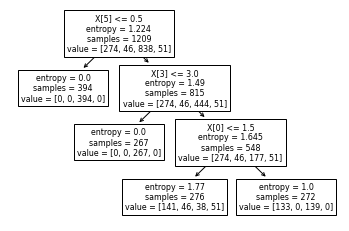

In [11]:
tree.plot_tree(clf)


In [12]:
names1=['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']

dot_data = tree.export_graphviz(clf,filled=True,feature_names=names1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("car") 

'car.pdf'

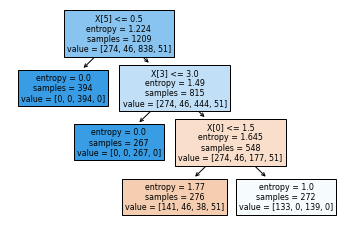

In [13]:
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.png',format='png',bbox_inches = "tight")


In [14]:

Result_PATH = 'D://AAA.xlsx'
writer = pd.ExcelWriter( Result_PATH , engine='xlsxwriter')
df_S1 = pd.DataFrame(xtest)

df_S1['predict'] = clf.predict(xtest)
df_S1['real_class'] = ytest
df_S1.to_excel(writer, sheet_name='SHEET1' ,index =False)

writer.save()
print( '成功產出'+Result_PATH )

成功產出D://AAA.xlsx


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

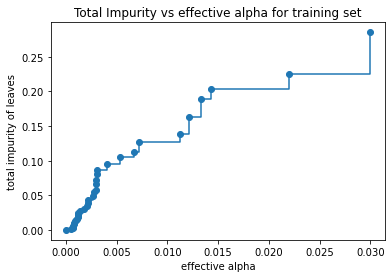

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08971514409289494


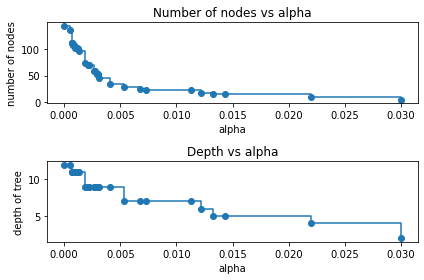

In [18]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

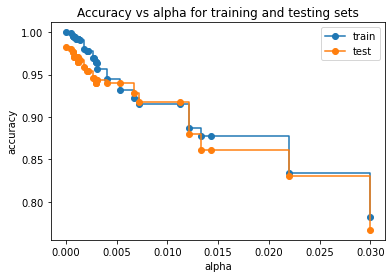

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()